<a href="https://colab.research.google.com/github/gatienc/multimodal_product_data_classification/blob/main/Inas_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nouvelle section

In [4]:
#loading the datasets
X_train = pd.read_csv('/content/X_train_update.csv')
Y_train = pd.read_csv('/content/Y_train_CVw08PX.csv')

In [5]:
#Showing first rows of the dataset
X_train.head(5)

,Unnamed: 0,designation,description,productid,imageid
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [6]:
Y_train.head()

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705


In [7]:
#dataset information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   84916 non-null  int64 
 1   designation  84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [8]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Unnamed: 0   84916 non-null  int64
 1   prdtypecode  84916 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


In [9]:
# We can see that we have some missing rows in the description colomn
X_train.isnull().sum()

Unnamed: 0         0
designation        0
description    29800
productid          0
imageid            0
dtype: int64

In [10]:
# Compter le nombre de produits par type
product_counts = Y_train['prdtypecode'].value_counts()

In [11]:
product_counts.info()

<class 'pandas.core.series.Series'>
Int64Index: 27 entries, 2583 to 1180
Series name: prdtypecode
Non-Null Count  Dtype
--------------  -----
27 non-null     int64
dtypes: int64(1)
memory usage: 432.0 bytes


In [12]:
# On sait qu'on a 27 types de produits
product_counts.head(30)

2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: prdtypecode, dtype: int64

In [13]:
 A = product_counts.to_numpy()
 print(A)

[10209  5073  5045  4993  4989  4870  4774  4760  4303  3953  3241  3116
  2761  2671  2589  2508  2496  2491  2070  1681  1421   872   832   824
   807   803   764]


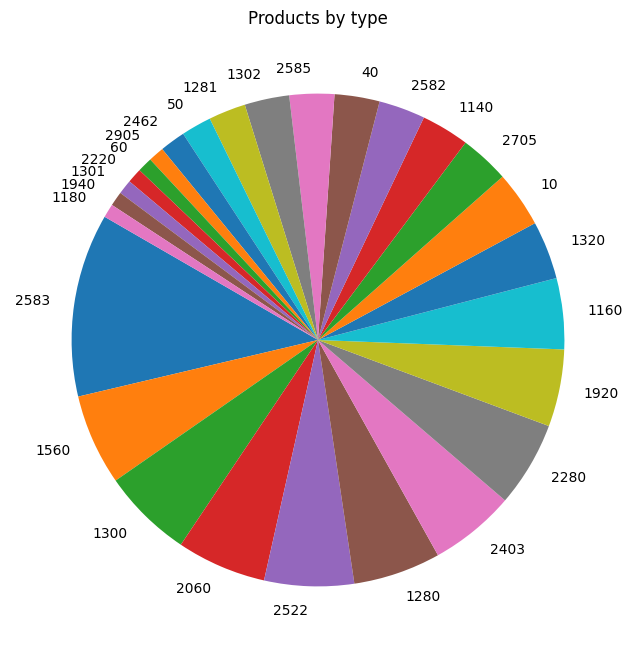

In [14]:
# Création du graphique circulaire

labels = ['2583','1560','1300','2060','2522','1280','2403','2280','1920','1160','1320','10','2705','1140','2582','40','2585','1302','1281','50','2462','2905','60','2220','1301','1940','1180']

plt.figure(figsize=(15, 8))
plt.pie(A, labels=labels, startangle=150)
plt.title('Products by type')

# Save the plot as an image
plt.savefig('pie_plot.png')

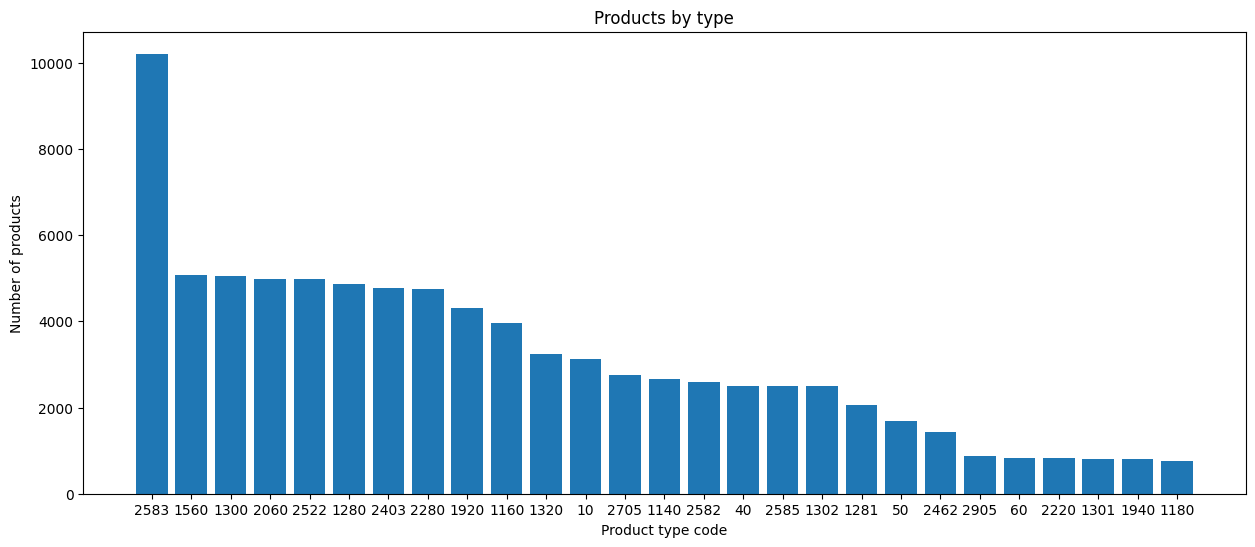

In [15]:
# Créer un graphique à barres
plt.figure(figsize=(15, 6))
plt.bar(labels, A)

# Ajouter des étiquettes et un titre
plt.xlabel('Product type code')
plt.ylabel('Number of products')
plt.title('Products by type')

# Save the plot as an image
plt.savefig('bar_plot.jpg')

# Afficher le graphique
plt.show()

In [16]:
# Define word_count function
def word_count(text):
    return len(str(text).split())

# Define unique_words function
def unique_words(text):
    return len(set(str(text).split()))

X_train['word_count_description'] = X_train['description'].apply(word_count)
X_train['word_count_designation'] = X_train['designation'].apply(word_count)

X_train['unique_word_count_description'] = X_train['description'].apply(unique_words)
X_train['unique_word_count_designation'] = X_train['designation'].apply(unique_words)

In [17]:
pip install plotly

In [18]:
pip install chart_studio

In [19]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly as py
from plotly.offline import iplot
import seaborn as sns
from plotly.subplots import make_subplots

In [20]:
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import seaborn as sns

word_count = X_train[[x for x in X_train.columns if "word_count" in x]]

fig = make_subplots(rows=1, cols=1)


for col in word_count.columns:
    trace = go.Box(y=word_count[col], name=col)
    fig.add_trace(trace, row=1, col=1)


fig.update_layout(title_text="Word Counts for Both Designation and Description", showlegend=False)


iplot(fig)


In [21]:
pip install umap-learn

In [22]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Merge the two DataFrames on the 'type' column
merged_df = pd.merge(X_train, Y_train)
merged_df.head()




,Unnamed: 0,designation,description,productid,imageid,word_count_description,word_count_designation,unique_word_count_description,unique_word_count_designation,prdtypecode
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,1,14,1,11,10
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,1,39,1,34,2280
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,109,12,88,12,50
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,1,10,1,9,1280
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,34,4,30,4,2705


In [23]:
!pip install unidecode
!pip install beautifulsoup4

In [24]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
from bs4 import BeautifulSoup
from unidecode import unidecode

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')


# Custom text preprocessing functions
def preprocess(text):
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove diacritics
    text = unidecode(text)

    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URLs
    text = ' '.join([word for word in text.split() if not (word.startswith('http') or word.startswith('www'))])

    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# Apply the custom preprocessing function to the 'designation' column
merged_df['designation'] = merged_df['designation'].apply(preprocess)

<ipython-input-24-9661b36e0338>:25: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



In [26]:
merged_df.head()

,Unnamed: 0,designation,description,productid,imageid,word_count_description,word_count_designation,unique_word_count_description,unique_word_count_designation,prdtypecode
0,0,"[olivia, personalisiertes, notizbuch, seiten, ...",NaN,3804725264,1263597046,1,14,1,11,10
1,1,"[journal, des, arts, le, ndeg, du, lart, et, s...",NaN,436067568,1008141237,1,39,1,34,2280
2,2,"[grand, stylet, ergonomique, bleu, gamepad, ni...",PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,109,12,88,12,50
3,3,"[peluche, donald, europe, disneyland, marionne...",NaN,50418756,457047496,1,10,1,9,1280
4,4,"[la, guerre, des, tuques]",Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,34,4,30,4,2705


In [27]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

sentences = merged_df['designation'].values
tokenizer = Tokenizer( filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(sentences)
#merged_df = tokenizer.texts_to_sequences(sentences)
merged_df['designation_sequences'] = tokenizer.texts_to_sequences(sentences)

merged_df['designation_padded'] = pad_sequences(merged_df['designation_sequences']).tolist()



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



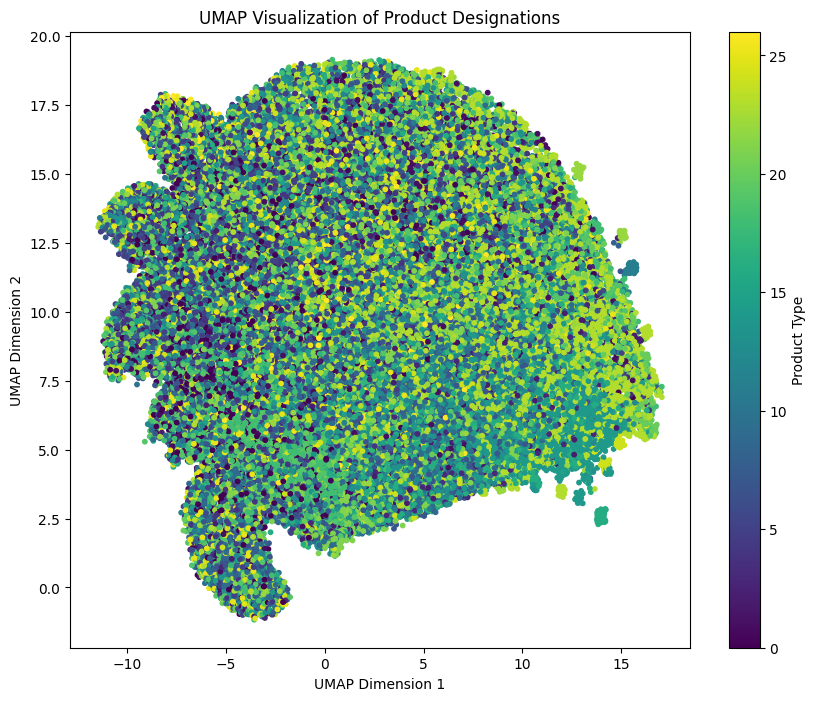

In [28]:
# Use UMAP to reduce dimensionality
reducer = umap.UMAP(n_neighbors=100, min_dist=1, n_components=2, random_state=42)
embedding = reducer.fit_transform(np.vstack(merged_df['designation_padded']))

# Encode the product types for color mapping
label_encoder = LabelEncoder()
merged_df['type_encoded'] = label_encoder.fit_transform(merged_df['prdtypecode'])

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=merged_df['type_encoded'], cmap='viridis', s=10)
plt.title('UMAP Visualization of Product Designations')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a colorbar for reference
cbar = plt.colorbar()
cbar.set_label('Product Type')

plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



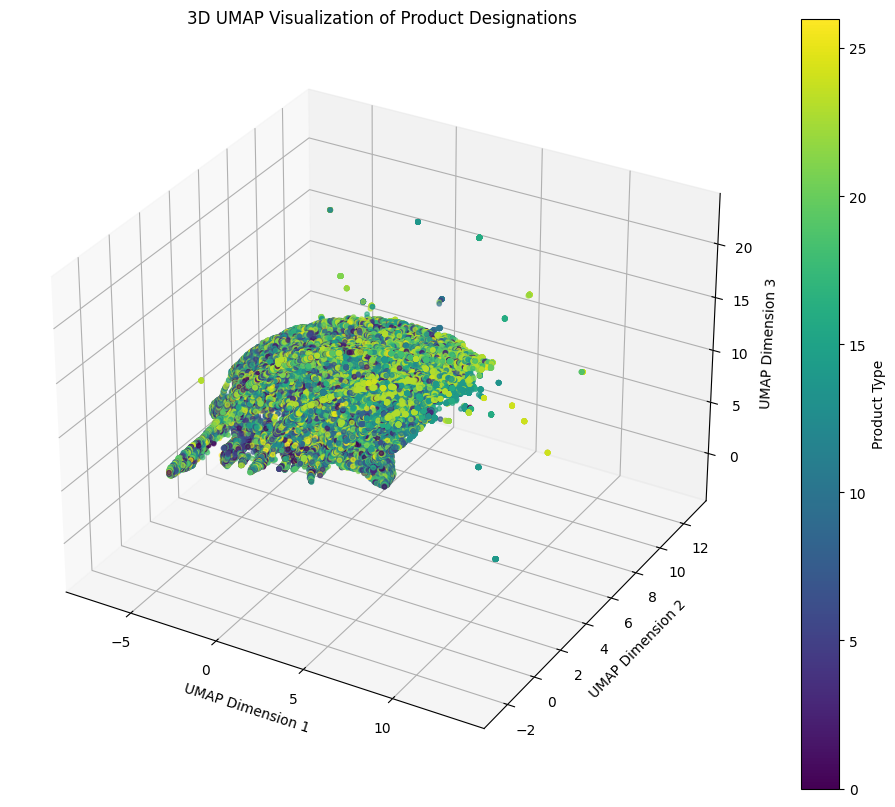

In [30]:
# Use UMAP to reduce dimensionality to 3D
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
embedding_3d = reducer.fit_transform(np.vstack(merged_df['designation_padded']))

# Encode the product types for color mapping
label_encoder = LabelEncoder()
merged_df['type_encoded'] = label_encoder.fit_transform(merged_df['prdtypecode'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], c=merged_df['type_encoded'], cmap='viridis', s=10)

ax.set_title('3D UMAP Visualization of Product Designations')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')

# Add a colorbar for reference
cbar = fig.colorbar(scatter)
cbar.set_label('Product Type')

plt.show()